In [16]:
import cirq

# Single qubit grid
qubit = cirq.GridQubit(0,0)

# Create a cirquit with a NOT gate and a measurment
circuit1 = cirq.Circuit(cirq.X(qubit), cirq.measure(qubit, key='m'))


In [17]:
# Display the cirquit

circuit1

(0, 0): ───X───M('m')───

In [20]:
# Create a simulator and simulate several times

simulator = cirq.Simulator()
result = simulator.run(circuit1, repetitions=10)
result

m=1111111111

## Prepare a Bell state

In [21]:
# Create a 2 qubit circuit

qreg = [cirq.LineQubit(x) for x in range(2)]
circuit2 = cirq.Circuit()

circuit2.append([cirq.H(qreg[0]), cirq.CNOT(qreg[0],qreg[1])])

In [22]:
# Add a measurement

circuit2.append(cirq.measure(*qreg, key="z"))

In [23]:
print(circuit2)

0: ───H───@───M('z')───
          │   │
1: ───────X───M────────


In [26]:
# Create a simulator and simulate several times

simulator = cirq.Simulator()
result = simulator.run(circuit2, repetitions=100)

In [27]:
# obtain statistics of results
print(result.histogram(key="z"))

Counter({3: 55, 0: 45})


## Parametrized Gates

In [28]:
import sympy
import matplotlib.pyplot as plt


In [29]:
qbit = cirq.LineQubit(0)
circuit3 = cirq.Circuit()

In [30]:
# add a parametrized gate
symbol = sympy.Symbol("t")

circuit3.append(cirq.XPowGate(exponent=symbol)(qbit))

In [31]:
# Add a measurement

circuit3.append(cirq.measure(qbit, key="z"))

In [33]:
circuit3

0: ───X^t───M('z')───

In [35]:
# Define a range of parameter values

sweep = cirq.Linspace(key=symbol.name, start=0.0, stop=2.0, length=100)

In [36]:
# simulate for all values

sim = cirq.Simulator()
res = sim.run_sweep(circuit3, sweep, repetitions=1000)

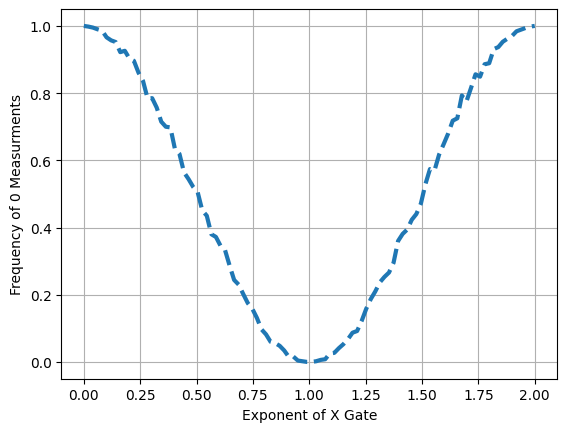

In [41]:
# Plot the results

angles = [x[0][1] for x in sweep.param_tuples()]
zeros = [res[i].histogram(key="z")[0]/1000 for i in range(len(res))]
plt.plot(angles, zeros, "--", linewidth=3)
plt.xlabel("Exponent of X Gate")
plt.ylabel("Frequency of 0 Measurments")
plt.grid()